In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [35]:
products_price_revenue = pd.read_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\products_viz_final.csv')

In [36]:
orderlines_revenue = pd.read_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\orderlines_cl.csv')

In [37]:
orders_revenue = pd.read_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\orders_cl.csv')

In [38]:
orderlines_revenue ['unit_price_total'] = (orderlines_revenue.unit_price * orderlines_revenue.product_quantity)

In [39]:
orderlines_revenue = orderlines_revenue.rename(columns ={'id_order' : 'order_id'})
orderlines_revenue

,id,order_id,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99


In [40]:
orderlines_revenue_grouped=(
orderlines_revenue
    .filter(['order_id','sku','product_quantity', 'unit_price', 'unit_price_total'])
    .groupby('order_id')
    .agg({'unit_price_total' : 'sum'})
)
orderlines_revenue_grouped

,unit_price_total
order_id,
241319,44.99
241355,135.98
241423,129.16
242832,10.77
243330,77.99
...,...
527397,42.99
527398,42.99
527399,141.58


In [41]:
orderlines_revenue_grouped = orderlines_revenue_grouped.merge(orders_revenue, how='left', on='order_id')
orderlines_revenue_grouped

,order_id,unit_price_total,created_date,total_paid,state
0,241319,44.99,2017-01-02 13:35:40,44.99,Cancelled
1,241355,135.98,NaN,NaN,NaN
2,241423,129.16,2017-11-06 13:10:02,136.15,Completed
3,242832,10.77,2017-12-31 17:40:03,15.76,Completed
4,243330,77.99,2017-02-16 10:59:38,84.98,Completed
...,...,...,...,...,...
204850,527397,42.99,2018-03-14 13:56:38,42.99,Place Order
204851,527398,42.99,2018-03-14 13:57:25,42.99,Shopping Basket
204852,527399,141.58,2018-03-14 13:57:34,141.58,Shopping Basket
204853,527400,19.98,2018-03-14 13:57:41,19.98,Shopping Basket


In [42]:
orderlines_grouped =(
orderlines_revenue_grouped  
            
            .query('state == "Completed"')
            .assign(difference = lambda x: (x['total_paid'] - x['unit_price_total']))
)

In [43]:
orderlines_grouped 

,order_id,unit_price_total,created_date,total_paid,state,difference
2,241423,129.16,2017-11-06 13:10:02,136.15,Completed,6.99
3,242832,10.77,2017-12-31 17:40:03,15.76,Completed,4.99
4,243330,77.99,2017-02-16 10:59:38,84.98,Completed,6.99
10,245275,149.00,2017-06-28 11:35:37,149.00,Completed,0.00
11,245595,105.98,2017-01-21 12:52:47,112.97,Completed,6.99
...,...,...,...,...,...,...
204567,527042,13.99,2018-03-14 11:47:50,18.98,Completed,4.99
204587,527070,19.98,2018-03-14 11:50:48,24.97,Completed,4.99
204590,527074,19.98,2018-03-14 11:51:42,24.97,Completed,4.99
204608,527096,29.97,2018-03-14 11:58:40,34.96,Completed,4.99


In [44]:
orderlines_grouped.total_paid.sum()

15907059.889999995

In [45]:
#orderlines_grouped.loc[(orderlines_grouped.unit_price_total < 2000)].count()

In [46]:
#orderlines_grouped.loc[orderlines_grouped.unit_price_total  6000]

In [47]:
orderlines_grouped.difference.mean()

4.238725730239768

In [48]:
orderlines_grouped.query('difference==0')
#13328

,order_id,unit_price_total,created_date,total_paid,state,difference
10,245275,149.00,2017-06-28 11:35:37,149.00,Completed,0.0
19,247643,153.54,2017-05-26 11:50:35,153.54,Completed,0.0
25,251302,140.99,2017-05-10 12:27:33,140.99,Completed,0.0
37,254341,34.98,2017-07-31 10:25:35,34.98,Completed,0.0
43,256158,386.18,2017-08-05 19:51:20,386.18,Completed,0.0
...,...,...,...,...,...,...
201507,523728,279.57,2018-03-13 10:02:26,279.57,Completed,0.0
201521,523742,257.92,2018-03-09 12:18:46,257.92,Completed,0.0
201534,523756,79.99,2018-03-12 15:38:15,79.99,Completed,0.0
203513,525852,36.99,2018-03-12 11:46:33,36.99,Completed,0.0


In [83]:
orderlines_grouped.difference.mean()

4.238725730239768

No handles with labels found to put in legend.


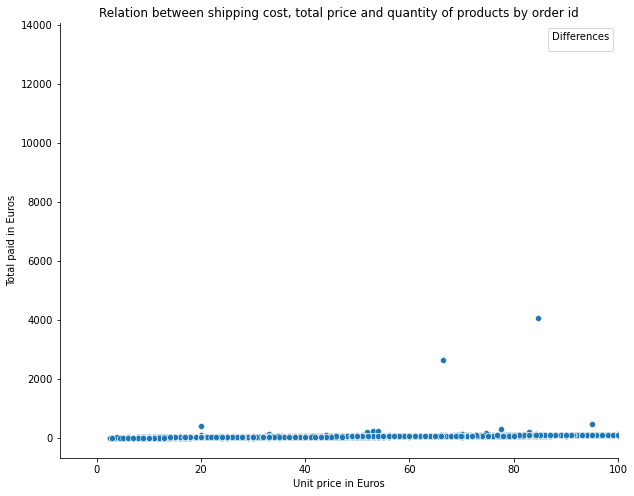

In [84]:
plt.subplots(figsize=(10, 8))

sns.scatterplot(data=orderlines_grouped, x='unit_price_total', y='total_paid', 
                #hue='orange',
             # define the size of each point based on the variable product quantity
                sizes=(20, 200), # range of size of the size variable
                palette='ch:start=.2,rot=-.3') # define manually the range of colors

plt.xlabel('Unit price in Euros')
plt.ylabel('Total paid in Euros')
plt.title('Relation between shipping cost, total price and quantity of products by order id')
plt.legend(title = 'Differences') # Change the title name of the legend
plt.xlim(-7, 100)
sns.despine()
plt.show()

In [85]:
products_revenue = orderlines_revenue.merge(products_price_revenue, how = 'left', on ='sku')

In [86]:
products_revenue.drop(columns ={'type','product_id','short'})

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,in_stock,price_new1,category,long
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,0.0,34.99,Others,Otterbox
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,0.0,429.00,Others,LG
2,1119111,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,0.0,699.00,Others,Parrot
3,1119112,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,0.0,79.00,Storage,Western Digital
4,1119113,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,1.0,29.90,Others,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,1.0,49.95,Battery,JBL
293979,1650200,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,1.0,215.98,Storage,Pack
293980,1650201,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,Apple Products,Apple
293981,1650202,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,0.0,29.99,Others,Be.ez


In [87]:
products_revenue= products_revenue.merge(orders_revenue, how ='left', on ='order_id')

In [88]:
products_revenue_orders= products_revenue.drop(columns={'type', 'product_id'})

In [89]:
products_order_completed= products_revenue_orders.query('state=="Completed"')

In [90]:
products_order_completed

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,in_stock,price_new1,short,category,long,created_date,total_paid,state
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1.0,60.99,OWC,Storage,OWC,2017-01-01 01:51:47,51.48,Completed
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0.0,22.95,IOT,Others,iOttie,2017-01-01 01:57:34,18.99,Completed
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1.0,89.00,APP,Apple Products,Apple,2017-01-01 02:02:38,72.19,Completed
11,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0.0,3209.00,PAC,Storage,Pack,2017-01-02 10:00:20,2565.99,Completed
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0.0,76.99,CRU,Storage,Crucial,2017-01-01 02:30:08,65.89,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0.0,24.99,TUC,Others,Tucano,2018-03-14 11:56:19,85.73,Completed
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:50:48,24.97,Completed
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:51:42,24.97,Completed
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:58:40,34.96,Completed


In [91]:
discount_calc =(

products_order_completed
        .filter(['order_id','sku','unit_price','price_new1','category'])
        .assign(percent = lambda x: (((x['price_new1'] - x['unit_price'])/x['price_new1'] * 100)))
        .assign(discount = lambda x: (x['price_new1'] - x['unit_price']))
)
discount_calc.sort_values('percent', ascending = False)


,order_id,sku,unit_price,price_new1,category,percent,discount
71325,359758,SEV0021,0.01,49.990,Service,99.979996,49.980
68348,358440,SEV0018,0.01,19.990,Service,99.949975,19.980
21711,318684,KIN0150,7.99,1728.001,Storage,99.537616,1720.011
13013,311256,KIN0150,7.99,1728.001,Storage,99.537616,1720.011
5199,304350,KIN0150,7.99,1728.001,Storage,99.537616,1720.011
...,...,...,...,...,...,...,...
263418,491926,REP0137,54.22,NaN,NaN,NaN,NaN
271427,511498,SEA0102,90.58,NaN,NaN,NaN,NaN
281434,519300,SEA0102,64.46,NaN,NaN,NaN,NaN
285481,522063,SEA0102,77.99,NaN,NaN,NaN,NaN


In [92]:
discount_calc.dropna()


,order_id,sku,unit_price,price_new1,category,percent,discount
7,299545,OWC0100,47.49,60.99,Storage,22.134776,13.50
8,299546,IOT0014,18.99,22.95,Others,17.254902,3.96
9,295347,APP0700,72.19,89.00,Apple Products,18.887640,16.81
11,299549,PAC0929,2565.99,3209.00,Storage,20.037706,643.01
18,299556,CRU0039-A,60.90,76.99,Storage,20.898818,16.09
...,...,...,...,...,...,...,...
293599,525664,TUC0207,16.52,24.99,Others,33.893557,8.47
293616,527070,APP0698,9.99,25.00,Apple Products,60.040000,15.01
293621,527074,APP0698,9.99,25.00,Apple Products,60.040000,15.01
293644,527096,APP0698,9.99,25.00,Apple Products,60.040000,15.01


In [93]:
discount_calc

,order_id,sku,unit_price,price_new1,category,percent,discount
7,299545,OWC0100,47.49,60.99,Storage,22.134776,13.50
8,299546,IOT0014,18.99,22.95,Others,17.254902,3.96
9,295347,APP0700,72.19,89.00,Apple Products,18.887640,16.81
11,299549,PAC0929,2565.99,3209.00,Storage,20.037706,643.01
18,299556,CRU0039-A,60.90,76.99,Storage,20.898818,16.09
...,...,...,...,...,...,...,...
293599,525664,TUC0207,16.52,24.99,Others,33.893557,8.47
293616,527070,APP0698,9.99,25.00,Apple Products,60.040000,15.01
293621,527074,APP0698,9.99,25.00,Apple Products,60.040000,15.01
293644,527096,APP0698,9.99,25.00,Apple Products,60.040000,15.01


In [94]:
discount_calc.query('discount > 0').sku.nunique()

5769

In [145]:
discount_calc.query('discount == 0').sku.count()

2492

In [96]:
discount_calc.discount.max()

2888.012

In [97]:
discount_plot =(
discount_calc
        .groupby('category')
        .agg({'unit_price': ['mean', 'max', 'min'], 'price_new1': 'mean', 'percent':'mean'})
)
discount_plot

unit_price                  price_new1    percent
                      mean      max    min        mean       mean
category                                                         
Accessories      44.988929   142.99  17.99   67.405298  35.932834
Adapters         51.838239  3157.80   1.00   65.939435        NaN
Apple Products  540.061465  5917.00   4.12  601.068351  15.005806
Battery          69.796822  1349.00   1.60   92.396526        NaN
Chargers         39.091739   599.00   6.19   51.108472  26.421565
Others          112.453843  3356.99   1.99  156.553056        NaN
Service          63.752490   249.99   0.01  262.280827  38.350740
Smartwatches    183.016861   338.99  34.98  258.790876  31.311546
Storage         273.863987  7335.59   2.47  344.351187  19.545199

TypeError: plot got an unexpected keyword argument 'x'

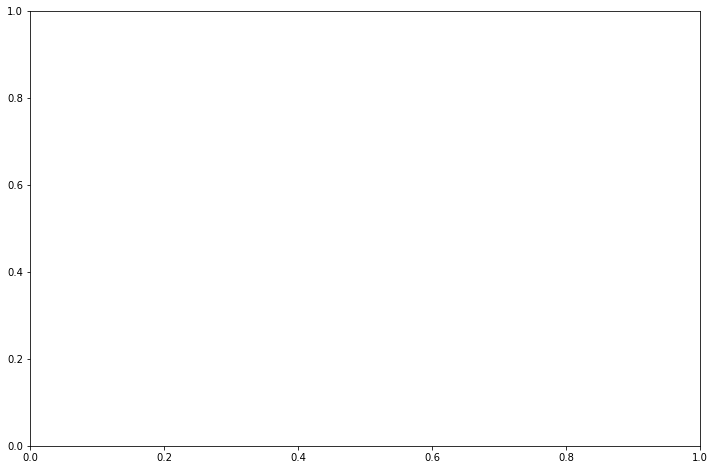

In [98]:
plt.subplots(figsize=(12, 8))

p = plt.plot(data=discount_calc, x='discount', y='category' )
    # dataframe we will use to look for the columns information
#t =  plt.plot_date(data=conversion_percent_2018, x='week', y='conversion_rate',linestyle='--')
    # group color in our chart
#    plt.plot_date(data=p_df, x='year_month', y=measure, linestyle='--')

plt.xlabel('discount') # x label name
plt.ylabel('Category') # y label name
#plt.axis([0,60, 0, 40])
plt.title('discount_vs_category') # title
#plt.legend('2017 2018')
plt.tight_layout()
#ax.set(xlim=(0, 60))
sns.despine()
#plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #
    

In [99]:

average_discount_cl =(
products_order_completed
    # create year and month
    .assign(year =products_order_completed['created_date'].dt.strftime('%Y'), 
           month =products_order_completed['created_date'].dt.strftime('%b'))
)
a_df_cl=(
average_discount_cl
    .filter(['sku','price_new1','month','year', 'unit_price'])
    .groupby(['year','month'])
    .agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
    .sort_values('year', ascending = False)
    .reset_index()
)
a_df_percent_cl =(
a_df_cl
    .assign(percent = lambda x: (((x['price_new1'] - x['unit_price'])/x['price_new1'] * 100)))
)
a_df_percent_cl

AttributeError: Can only use .dt accessor with datetimelike values

In [101]:
products_order_completed.to_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\products_order_completed.csv', index=False)

In [102]:
products_order_completed['date'] = pd.to_datetime(products_order_completed['date'])

C:\Users\Ajith\AppData\Local\Temp/ipykernel_12532/1883295871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_order_completed['date'] = pd.to_datetime(products_order_completed['date'])


In [103]:
products_order_completed

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,in_stock,price_new1,short,category,long,created_date,total_paid,state
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1.0,60.99,OWC,Storage,OWC,2017-01-01 01:51:47,51.48,Completed
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0.0,22.95,IOT,Others,iOttie,2017-01-01 01:57:34,18.99,Completed
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1.0,89.00,APP,Apple Products,Apple,2017-01-01 02:02:38,72.19,Completed
11,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0.0,3209.00,PAC,Storage,Pack,2017-01-02 10:00:20,2565.99,Completed
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0.0,76.99,CRU,Storage,Crucial,2017-01-01 02:30:08,65.89,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0.0,24.99,TUC,Others,Tucano,2018-03-14 11:56:19,85.73,Completed
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:50:48,24.97,Completed
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:51:42,24.97,Completed
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.0,25.00,APP,Apple Products,Apple,2018-03-14 11:58:40,34.96,Completed


In [150]:

average_discount = (
products_order_completed
    # create year and month
    .assign( year_month = products_order_completed['date'].dt.to_period(freq='M')) 
    .assign(discount = lambda x: (x['price_new1'] - x['unit_price']))
    
)
#average_discount['percent'] = ((average_discount['discount'] / average_discount['price_new1'])* 100).round(2)

#average_discount.assign(percent = lambda x: (discount * 100))
average_discount_cl = (

average_discount
    .filter(['order_id','year_month','total_paid','discount'])
    .groupby(['year_month'])
    .agg({'total_paid' : 'sum','discount':'sum'})
    .sort_values('year_month', ascending = False)
    .reset_index()
    #.groupby(['year_month'])
    

)

average_discount_cl




,year_month,total_paid,discount
0,2018-03,776280.29,85380.07336
1,2018-02,1663874.28,207006.06488
2,2018-01,3039368.56,338364.05366
3,2017-12,2824520.52,346690.48328
4,2017-11,4827494.94,608325.63264
5,2017-10,1696911.21,225993.13243
6,2017-09,1346267.46,173262.27615
7,2017-08,1269774.21,159818.03725
8,2017-07,1751133.39,229839.92434
9,2017-06,1110100.67,114439.35453


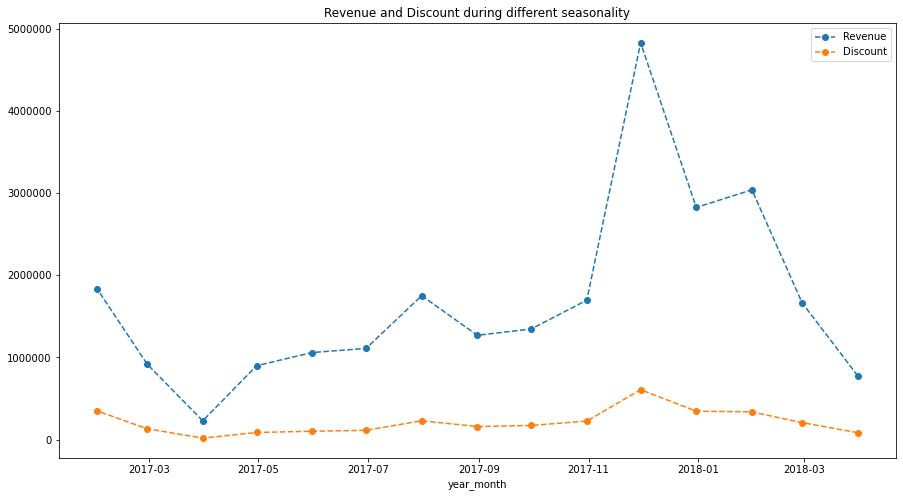

In [151]:
plt.subplots(figsize=(15,8))
for measure in ['total_paid','discount']: 
    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
    plt.plot_date(data=average_discount_cl, x='year_month', y=measure, linestyle='--')
#t = plt.plot_date(data=average_discount_cl, x = 'year_month', y = 'total_paid',linestyle= '--')
#p = plt.plot_date(data=average_discount_cl, x = 'year_month', y = 'disocunt',linestyle= '--')

plt.xlabel('year_month')
plt.ylabel('')
plt.title('Revenue and Discount during different seasonality')
plt.legend(['Revenue','Discount'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:

#.agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
   # .sort_values('year_month', ascending = False)
    #.reset_index()       
           #month = orders['created_date'].dt.strftime('%b'))
average_discount =(
    


#average_discount_cleaning = average_discount.drop_duplicates(subset = 'sku')
average_discount_cleaning
a_df=(
average_discount_cleaning
    .filter(['id_order','month','year'])
    .groupby(['year','month'])
    #.agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
    .sort_values('year', ascending = False)
    .reset_index()
)
a_df_percent =(
a_df
    .assign(percent = lambda x: (((x['price_new1'] - x['unit_price'])/x['price_new1'] * 100)))
)
a_df_percent


In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplots(figsize=(14, 10))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.barplot(data=a_df_percent, x='month', y='percent', hue ='year', order= months)

plt.xlabel('month') # x label name
plt.ylabel('percent') # y label name
plt.title('Discount_percent') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #